In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = 'data/credit-score'

In [3]:
train_df = pd.read_csv(f'{DATA_DIR}/train.csv', low_memory=False)
test_df = pd.read_csv(f'{DATA_DIR}/test.csv')

In [4]:
train_df.shape, test_df.shape

((100000, 28), (50000, 27))

In [5]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
test_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [7]:
train_df.drop(
    columns=[
        'ID', 'Customer_ID', 'Month', 'SSN', 'Name', 
        'Occupation', 'Credit_Utilization_Ratio', 'Payment_Behaviour'
    ], 
    inplace=True
)

In [8]:
train_df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score'],
      dtype='object')

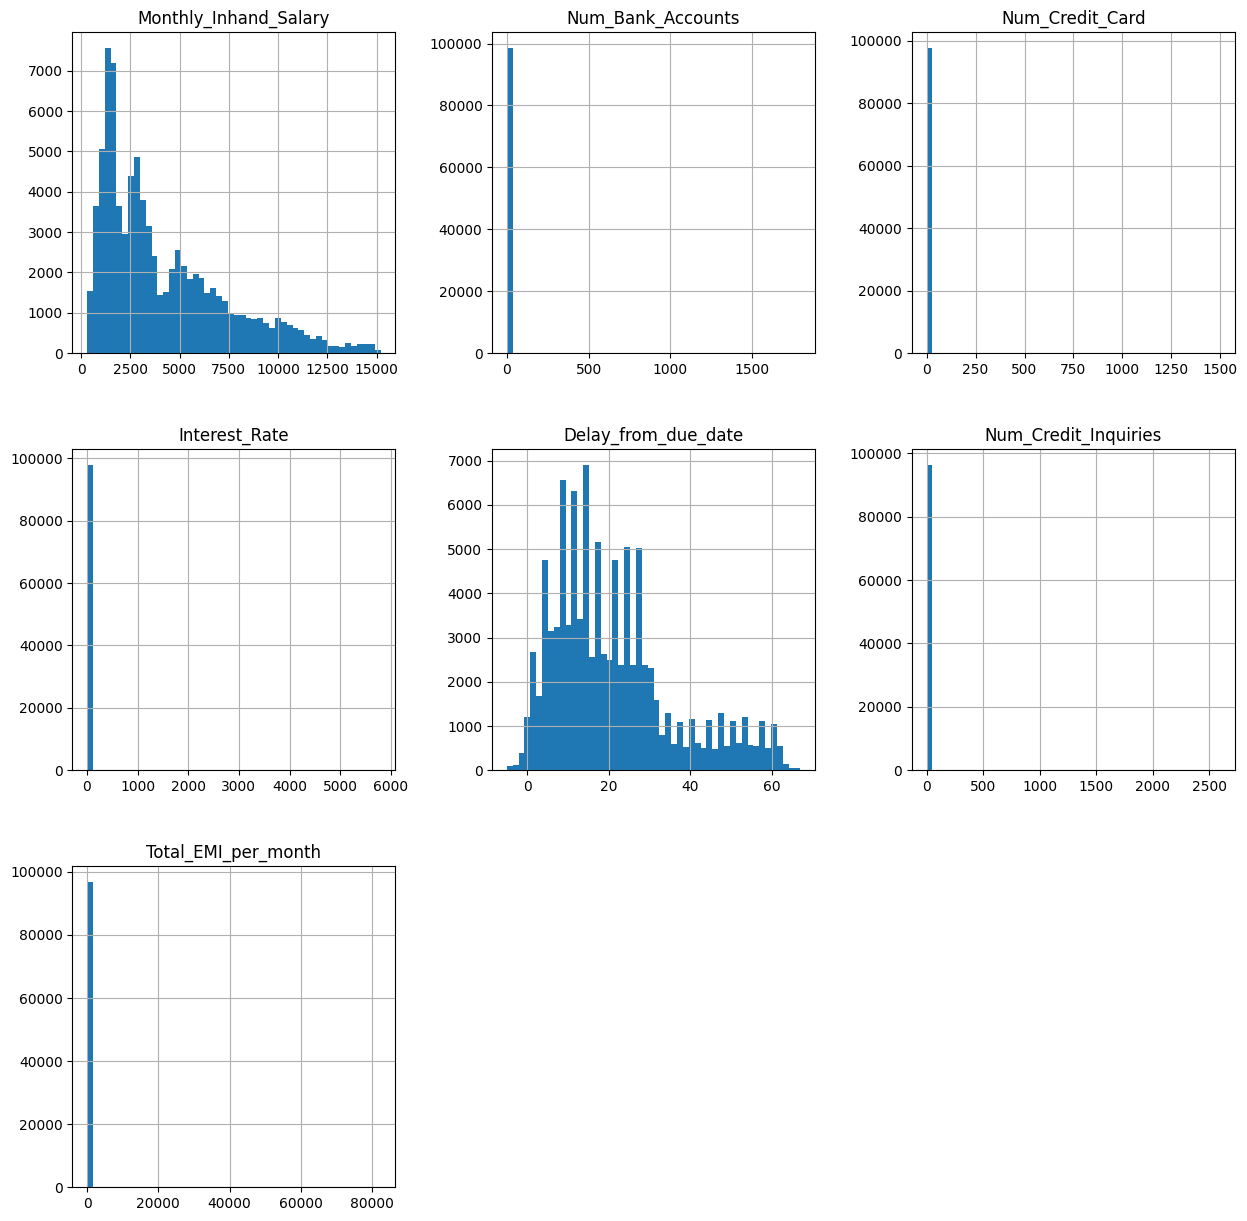

In [9]:
train_df.hist(bins=50, figsize=(15,15))
plt.show()

In [10]:
train_df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,22 Years and 1 Months,No,49.574949,80.41529543900253,312.49408867943663,Good
1,23,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,NaN,No,49.574949,118.28022162236736,284.62916249607184,Good
2,-500,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,22 Years and 3 Months,No,49.574949,81.699521264648,331.2098628537912,Good
3,23,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,22 Years and 4 Months,No,49.574949,199.4580743910713,223.45130972736786,Good
4,23,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,22 Years and 5 Months,No,49.574949,41.420153086217326,341.48923103222177,Good


In [11]:
def dirty_data_finding(df):
    dirty = []
    columns = df.columns
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        dirty.append([col,dtype,nunique,null,duplicates])
    df_dirty_data_finding = pd.DataFrame(dirty)
    df_dirty_data_finding.columns = ['column','dtype','nunique','null','duplicates']
    return df_dirty_data_finding

dirty_data_finding(train_df)

,column,dtype,nunique,null,duplicates
0,Age,object,1788,0,98212
1,Annual_Income,object,18940,0,81060
2,Monthly_Inhand_Salary,float64,13235,15002,86764
3,Num_Bank_Accounts,int64,943,0,99057
4,Num_Credit_Card,int64,1179,0,98821
5,Interest_Rate,int64,1750,0,98250
6,Num_of_Loan,object,434,0,99566
7,Type_of_Loan,object,6260,11408,93739
8,Delay_from_due_date,int64,73,0,99927
9,Num_of_Delayed_Payment,object,749,7002,99250


In [12]:
# train_df = train_df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"')).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)

In [13]:
train_df.isnull().sum()

Age                            0
Annual_Income                  0
Monthly_Inhand_Salary      15002
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan               11408
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Changed_Credit_Limit           0
Num_Credit_Inquiries        1965
Credit_Mix                     0
Outstanding_Debt               0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Monthly_Balance             1200
Credit_Score                   0
dtype: int64

In [14]:
train_df.drop(
    columns=[
        'Monthly_Inhand_Salary', 'Type_of_Loan', 'Credit_History_Age', 'Monthly_Balance',
        'Interest_Rate'
    ],
    inplace=True
)

In [15]:
categorical = train_df.dtypes[train_df.dtypes == "object"].index
train_df[categorical].describe().transpose()

,count,unique,top,freq
Age,100000,1788,38,2833
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Num_of_Delayed_Payment,92998,749,19,5327
Changed_Credit_Limit,100000,4384,_,2091
Credit_Mix,100000,4,Standard,36479
Outstanding_Debt,100000,13178,1360.45,24
Payment_of_Min_Amount,100000,3,Yes,52326
Amount_invested_monthly,95521,91049,__10000__,4305
Credit_Score,100000,3,Standard,53174


In [16]:
train_df.dtypes

Age                         object
Annual_Income               object
Num_Bank_Accounts            int64
Num_Credit_Card              int64
Num_of_Loan                 object
Delay_from_due_date          int64
Num_of_Delayed_Payment      object
Changed_Credit_Limit        object
Num_Credit_Inquiries       float64
Credit_Mix                  object
Outstanding_Debt            object
Payment_of_Min_Amount       object
Total_EMI_per_month        float64
Amount_invested_monthly     object
Credit_Score                object
dtype: object

In [17]:
for index, row in train_df.iterrows():
    if isinstance(row['Num_of_Delayed_Payment'], str):
        if row['Num_of_Delayed_Payment'][-1] == '_':
            train_df.loc[index, 'Num_of_Delayed_Payment'] = int(row['Num_of_Delayed_Payment'][:-1])

In [18]:
train_df['Num_of_Delayed_Payment'].fillna(0, inplace=True)
train_df['Num_Credit_Inquiries'].fillna(0, inplace=True)
train_df['Amount_invested_monthly'].fillna(0, inplace=True)

In [19]:
train_df = train_df.applymap(lambda x: x if x is np.NaN or not isinstance(x, str) else str(x).strip('_ ,"'))

In [20]:
train_df['Num_of_Delayed_Payment'] = pd.to_numeric(train_df['Num_of_Delayed_Payment'])
train_df['Amount_invested_monthly'] = pd.to_numeric(train_df['Amount_invested_monthly'])

In [21]:
train_df.isnull().sum()

Age                        0
Annual_Income              0
Num_Bank_Accounts          0
Num_Credit_Card            0
Num_of_Loan                0
Delay_from_due_date        0
Num_of_Delayed_Payment     0
Changed_Credit_Limit       0
Num_Credit_Inquiries       0
Credit_Mix                 0
Outstanding_Debt           0
Payment_of_Min_Amount      0
Total_EMI_per_month        0
Amount_invested_monthly    0
Credit_Score               0
dtype: int64

In [22]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

for column in train_df.columns:
    if train_df[column].dtypes == 'object':
        train_df[column] = ordinal_encoder.fit_transform(train_df[column].values.reshape(-1,1))

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = train_df.drop('Credit_Score', axis=1)
y = train_df['Credit_Score']

X = pd.get_dummies(X)
mms = MinMaxScaler()
X = mms.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [24]:
X_train.shape, X_test.shape

((90000, 14), (10000, 14))

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

mlp = HistGradientBoostingClassifier()
mlp.fit(X_train, y_train)
print(f'Train acc = {(accuracy_score(y_train, mlp.predict(X_train)) * 100.0):.2f}%')
print(f'Test acc = {(accuracy_score(y_test, mlp.predict(X_test)) * 100.0):.2f}%')

Train acc = 75.59%
Test acc = 72.17%


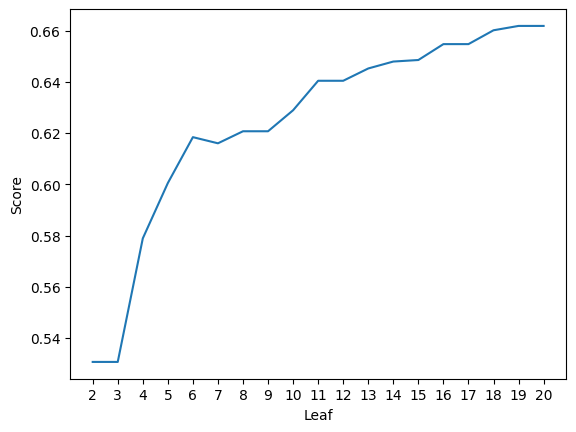

Decision Tree Accuracy: 66.18%


In [26]:
from sklearn.tree import DecisionTreeClassifier

scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

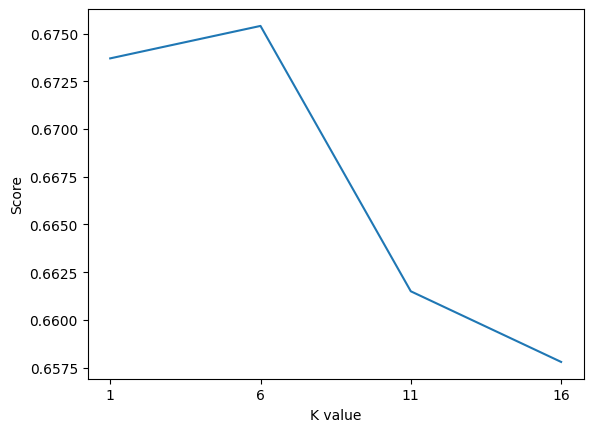

KNN best accuracy: 67.54%


In [27]:
from sklearn.neighbors import KNeighborsClassifier

scoreListknn = []
for i in range(1,21,5):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21,5), scoreListknn)
plt.xticks(np.arange(1,21,5))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

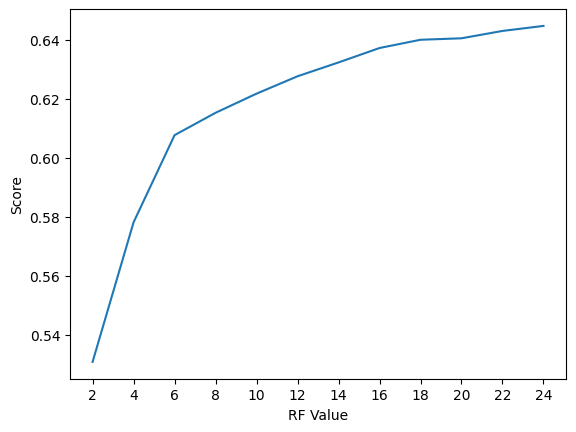

Random Forest Accuracy:  64.48%


In [29]:
from sklearn.ensemble import RandomForestClassifier

scoreListRF = []
for i in range(2,25,2):
    RFclassifier = RandomForestClassifier(n_estimators = 100, random_state = 42, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25,2), scoreListRF)
plt.xticks(np.arange(2,25,2))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

In [31]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators=2000, bootstrap=True)
etc.fit(X_train, y_train)

print(f"Train acc = {(etc.score(X_train,y_train) * 100):.2f}%")
print(f"Test acc = {(etc.score(X_test,y_test) * 100):.2f}%")

Train acc = 99.99%
Test acc = 76.55%


In [32]:
import joblib 

joblib.dump(mms, 'artifacts/credit_scaler.pkl')
joblib.dump(DTclassifier, 'artifacts/credit_model.pkl')

['artifacts/credit_model.pkl']